In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [45]:
numeric_columns=['Shares (Basic)',
       'Shares (Diluted)', 'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity',
       'Price_Present']

In [46]:
clean_fundamen=pd.read_csv("dataset_1.csv")
LabnF=pd.read_csv("./labnf.csv")
X,Y=clean_fundamen[numeric_columns],LabnF["Label"]
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [47]:
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree_clf=DecisionTreeClassifier(max_depth=18,criterion="entropy")

In [50]:
y_train[0]=3

In [51]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18)

In [52]:
tree_clf.score(X_test,y_test)

0.45826959034506204

In [53]:
from sklearn.tree import export_graphviz

In [54]:
f=open("./tree.dot","w+")
export_graphviz(tree_clf,out_file=f,feature_names=numeric_columns,class_names=["BUY","SELL","HOLD","IDK"],rounded=True,filled=True)
f.close()

In [12]:
tree_clf.score(X_train,y_train)

0.6913645828906548

![](tree.png)

In [13]:
LabnF

,Label,Price_Future
0,0,41.48
1,0,43.95
2,0,48.71
3,1,35.69
4,2,36.66
...,...,...
58823,1,21.06
58824,0,25.38
58825,0,31.68
58826,0,38.29


array([[<AxesSubplot:title={'center':'Label'}>,
        <AxesSubplot:title={'center':'Price_Future'}>]], dtype=object)

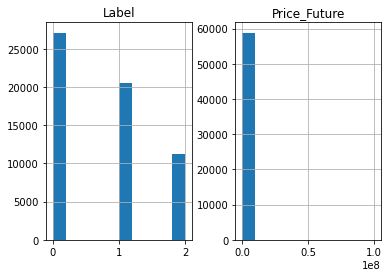

In [14]:
LabnF.hist()

In [15]:
tree_clf.tree_

In [16]:
tree=tree_clf.tree_

In [17]:
tree.decision_path

<function Tree.decision_path>

In [18]:
# dir(tree)

In [19]:
# dir(tree.decision_path)

In [20]:
tree.children_left[0]

1

In [21]:
# dir(tree)

In [22]:
# dir(tree.predict)

In [23]:
# n_nodes = tree.node_count
# children_left = tree.children_left
# children_right = tree.children_right
# feature = tree.feature
# threshold = tree.threshold

# node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
# is_leaves = np.zeros(shape=n_nodes, dtype=bool)
# stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
# while len(stack) > 0:
#     # `pop` ensures each node is only visited once
#     node_id, depth = stack.pop()
#     node_depth[node_id] = depth

#     # If the left and right child of a node is not the same we have a split
#     # node
#     is_split_node = children_left[node_id] != children_right[node_id]
#     # If a split node, append left and right children and depth to `stack`
#     # so we can loop through them
#     if is_split_node:
#         stack.append((children_left[node_id], depth + 1))
#         stack.append((children_right[node_id], depth + 1))
#     else:
#         is_leaves[node_id] = True

# print("The binary tree structure has {n} nodes and has "
#       "the following tree structure:\n".format(n=n_nodes))
# for i in range(n_nodes):
#     if is_leaves[i]:
#         print("{space}node={node} is a leaf node.".format(
#             space=node_depth[i] * "\t", node=i))
#     else:
#         print("{space}node={node} is a split node: "
#               "go to node {left} if X[:, {feature}] <= {threshold} "
#               "else to node {right}.".format(
#                   space=node_depth[i] * "\t",
#                   node=i,
#                   left=children_left[i],
#                   feature=feature[i],
#                   threshold=threshold[i],
#                   right=children_right[i]))

In [24]:
# dir(tree)

In [25]:
tree.value.argmax(axis=2)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [26]:
tree.impurity

array([1.50058298, 1.48111189, 1.42514533, ..., 0.        , 0.        ,
       0.        ])

In [27]:
tree.max_n_classes=4

In [28]:
tree.max_n_classes

4

In [29]:
tree.n_classes

array([4])

In [30]:
for i in range(len(tree.impurity)):
    if  tree.impurity[i]<1:
        tree.value[i][0][3]=max(tree.value[i][0])+10
        

In [31]:
tree.value.argmax(axis=2)

array([[0],
       [0],
       [1],
       ...,
       [3],
       [3],
       [3]])

In [32]:
# import sklearn.tree as tree2
# import matplotlib.pyplot as plt
# plt.figure(figsize=(60,20))
# tree2.plot_tree(tree_clf)
# plt.savefig("tree.png")

In [33]:
tree_clf.score(X_test,y_test)

0.26525582185959545

In [34]:
preds_X=tree_clf.predict(X_test)

In [35]:
y_test=np.array(y_test)
correct=0
total=len(preds_X)
for i in range(len(preds_X)):
    if(preds_X[i]==3):
        total-=1
    else:
        if(preds_X[i]==y_test[i]):
            correct+=1
        else:
            pass
    

In [36]:
correct

3121

In [37]:
total

6628

In [38]:
len(preds_X)

11766

In [39]:
correct/total

0.4708811104405552

In [40]:
y_test=np.array(y_test)
correct=0
total=len(preds_X)
for i in range(len(preds_X)):
    if(preds_X[i]==y_test[i]):
        correct+=1
    else:
        pass

In [41]:
correct/total

0.26525582185959545

In [43]:
# f=open("./tree.dot","w+")
# export_graphviz(tree_clf,out_file=f,feature_names=numeric_columns,class_names=["BUY","SELL","HOLD","IDK"],rounded=True,filled=True)
# f.close()

(array([5359.,    0.,    0., 1084.,    0.,    0.,  185.,    0.,    0.,
        5138.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

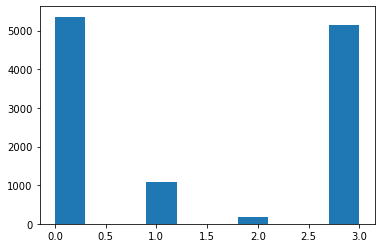

In [57]:
import matplotlib.pyplot as plt
plt.hist(preds_X)